In [1]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

import dataset_without_pytorch

from dataset_without_pytorch import get_loader

In [28]:
data_flag = 'organcmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(dataset_without_pytorch, info['python_class'])

In [29]:
n_channels

1

In [30]:
n_classes

11

In [31]:
# load the data
train_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)

#load the test data
test_dataset = DataClass(split='test', download=download)
test_loader = get_loader(dataset=test_dataset, batch_size=2*BATCH_SIZE)

Using downloaded and verified file: /Users/jiehyun/.medmnist/organcmnist.npz
Using downloaded and verified file: /Users/jiehyun/.medmnist/organcmnist.npz


In [32]:
print(train_dataset)
print('======================================================================================')
print(test_dataset)

Dataset OrganCMNIST (organcmnist)
    Number of datapoints: 13000
    Root location: /Users/jiehyun/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}
    Number of samples: {'train': 13000, 'val': 2392, 'test': 8268}
    Description: The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1×28×28 to perform multi-cl

In [33]:
# visualization

train_dataset.montage(length=1)

/opt/homebrew/lib/python3.10/site-packages/medmnist/utils.py:25: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


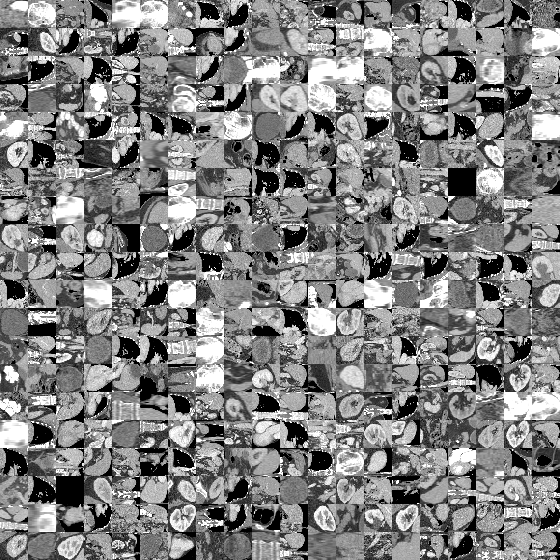

In [34]:
# montage

train_dataset.montage(length=20)

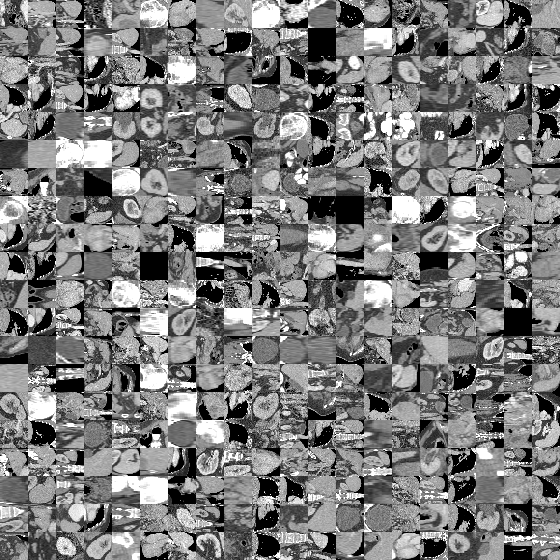

In [35]:
test_dataset.montage(length=20)

In [10]:
train_dataset.labels

array([[5],
       [8],
       [6],
       ...,
       [2],
       [4],
       [5]], dtype=uint8)

In [14]:
train_dataset.imgs

array([[[ 44,  49,  39, ..., 215, 183, 192],
        [ 59,  46,  46, ..., 176, 163, 200],
        [ 57,  51,  54, ..., 184, 177, 183],
        ...,
        [125, 143, 173, ..., 233, 235, 211],
        [150, 124, 130, ..., 235, 223,  73],
        [142, 142, 154, ...,  90,  65,  40]],

       [[  0,   0,   0, ...,  54,  68,  61],
        [  0,   0, 133, ...,  83,  81, 125],
        [ 85,  57,  42, ..., 114, 145, 147],
        ...,
        [227, 255,  99, ..., 134, 130,  90],
        [255, 162, 107, ..., 139, 112, 138],
        [145, 112, 108, ..., 255, 255,  85]],

       [[ 58,  63,  53, ..., 150, 150, 154],
        [ 51,  48,  47, ...,  61,  60,  69],
        [ 48,  51,  65, ...,  63,  73, 107],
        ...,
        [124, 104, 168, ...,   0,   0,   0],
        [134, 143, 146, ...,   0,   0,   0],
        [122, 145, 148, ...,   0,   0,   0]],

       ...,

       [[255, 255, 255, ..., 137, 155, 141],
        [255, 255, 255, ..., 156, 164, 188],
        [255, 255, 255, ..., 156, 164, 188

In [12]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, array([5]))

In [9]:
x, y = train_dataset[0]

print(np.array(x).shape, y.shape)

(28, 28) (1,)


In [40]:
for x, y in train_loader:
    print(np.asarray(x).shape, np.asarray(y).shape)
    break

Size 13000
(128, 28, 28) (128, 1)


In [42]:
import matplotlib.pyplot as plt

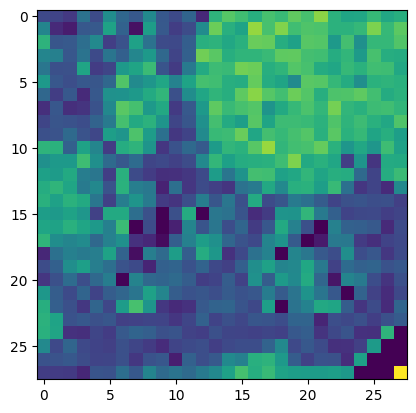

In [43]:
plt.imshow(x[0])

In [54]:
z, w = test_dataset[0]

print(np.array(z).shape, w.shape)

(28, 28) (1,)


In [55]:
for z, w in test_loader:
    print(np.asarray(z).shape, np.asarray(w).shape)
    break

Size 8268
(256, 28, 28) (256, 1)


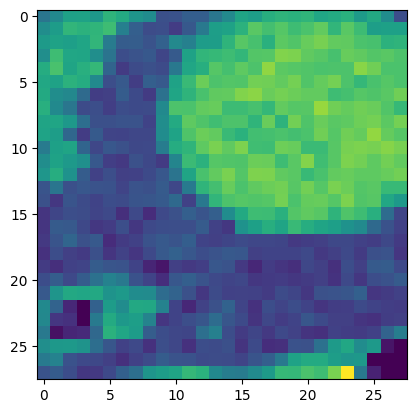

In [56]:
plt.imshow(z[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


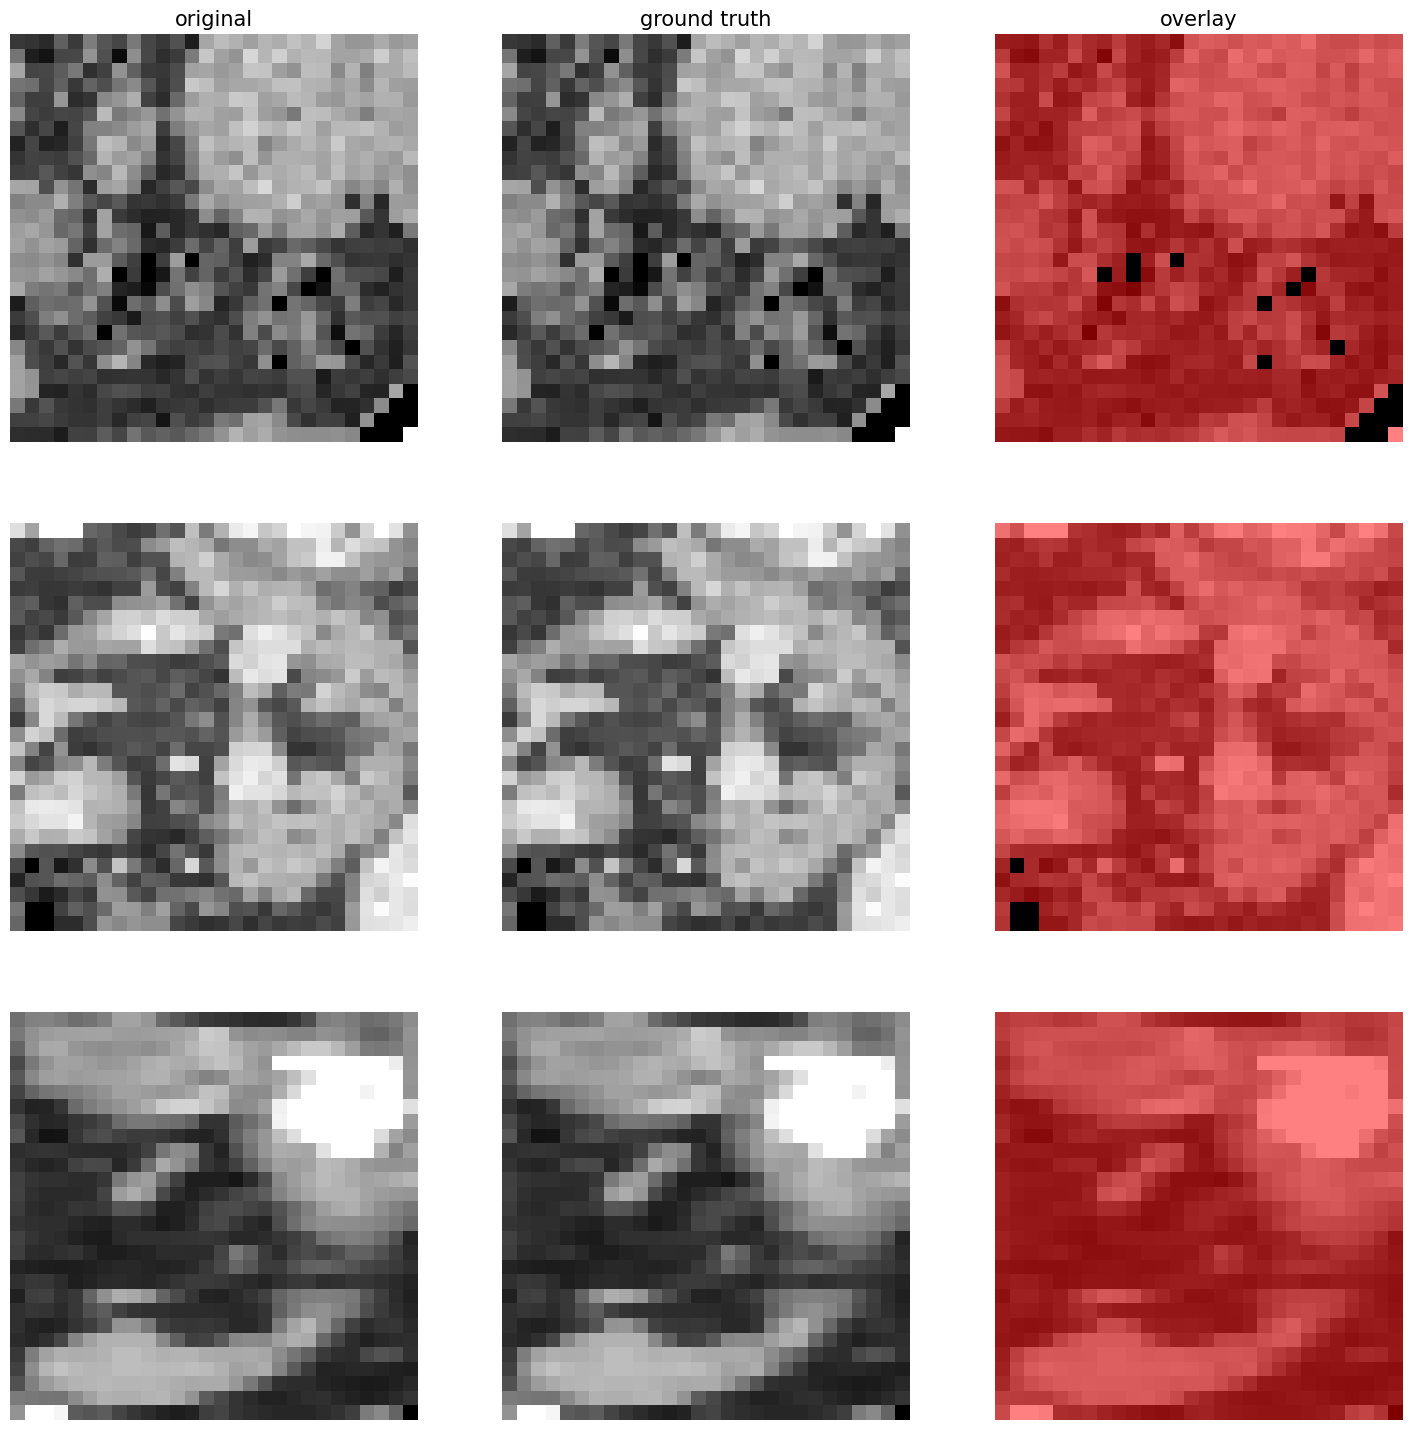

In [47]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=x, mask_imgs=x, nm_img_to_plot=3, figsize=6)

In [36]:
from keras_unet.models import custom_unet

input_shape = x.shape

model = custom_unet(
    input_shape,
    filters=32,
    use_batch_norm=True,
    dropout=0.3,
    dropout_change_per_layer=0.0,
    num_layers=5
)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


ValueError: Input 0 of layer "spatial_dropout2d" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 1, 28, 28, 32)